### Question 1

In [58]:
import string
import pandas as pd
import numpy as np
from collections import Counter
aas = sorted(set(string.ascii_uppercase) - set("BJOZXU"))
def numerator(s,p):
    c = Counter()
    for x,y in zip(s,p):
        if y == 'H':
            if x in c:
                c[x] += 1
            else:
                c[x] = 1
    c =  {x:y / s.count(x) for x,y in c.items()}
    for a in aas:
        if a not in c:
            c[a] = 0
    return c
def denom(p):
    return p.count('H') / len(p)

def prop(s,p):
    d = {x : y / denom(p) for x,y in numerator(s,p).items()}
    df = pd.DataFrame(data = [d.values()]).T
    df.index = d.keys()
    df.columns = ["Propensity"]
    return df

In [59]:
s = "LGASGIAAFAFGSTAILIILFNMAAEVHFDPLQFFRQFFWLGLYPPKAQYGMGIPPLHDGGWWLMAGLFMTLSLGSWWIRVYSRARALGLGTHIAWNFAAAIFFVLCIGCIHPTLVGSWSEGVPFGIWPHIDWLTAFSIRYGNFYYCPWHGFSIGFAYGCGLLFAAHGATILAVARFGGDREIEQITDRGTAVERAALFW"
p = "XHHHHHHHHHHHHHHHHHHHHHHHHHXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHXXHHHHHHHHHHHHHHHHHXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXHHHHHHHHHHHHHHHHHHHHHHHHHHXXXXXXXXXXXXXXXXXXXXXXXXXXX"
prop(s,p)

,Propensity
G,1.061224
A,1.551020
S,1.360544
I,1.200480
F,1.020408
T,0.765306
L,1.224490
N,1.360544
M,1.530612
E,0.408163


### Question 2

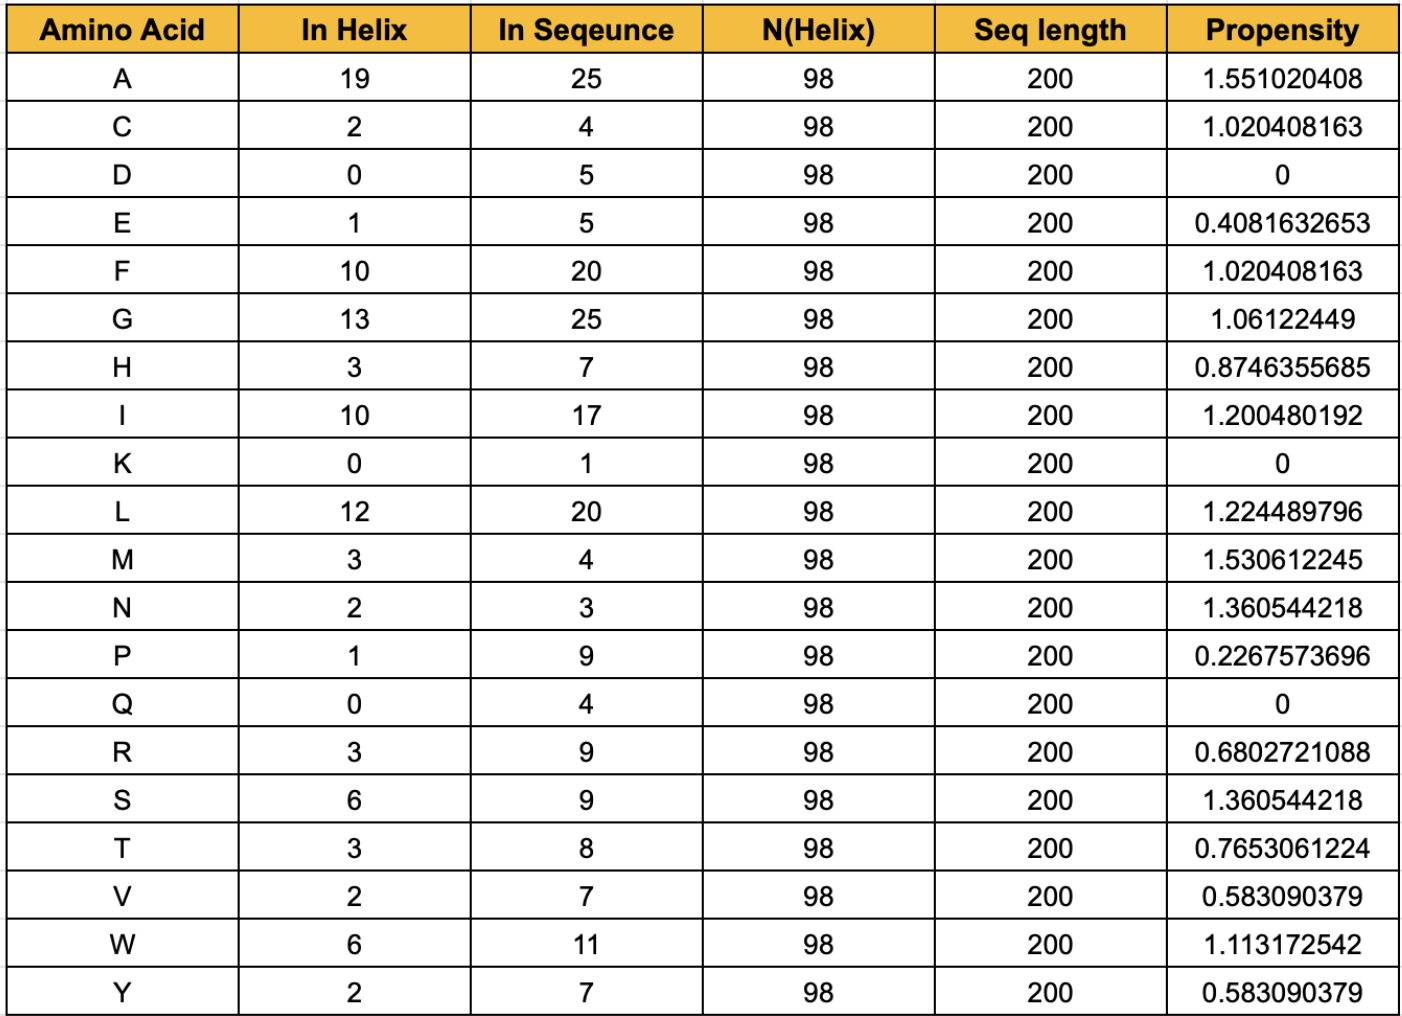

### Question 3

In [3]:
pa = {x:y for x,y in zip("EALHMQWVFKIDTSRCNYPG",[1.53,1.45,1.34,1.24,1.20,1.17,1.14,1.14,1.12,1.07,1.00,0.98,0.82,0.79,0.79,0.77,0.73,0.61,0.59,0.53])}
pb = {x:y for x,y in zip("MVICYFQLTWARGDKSHNPE",[1.67,1.65,1.60,1.30,1.29,1.28,1.23,1.22,1.20,1.19,0.97,0.90,0.81,0.80,0.74,0.72,0.71,0.65,0.62,0.26])}
npa = {'E': 1, 'A': 1, 'L': 1, 'H': 1, 'M': 1, 'Q': 1, 'W': 1, 'V': 1, 'F': 1, 'K': 0.5, 'I': 0.5, 'D': 0, 'T': 0, 'S': 0, 'R': 0, 'C': 0, 'N': -1, 'Y': -1, 'P': -1, 'G': -1}
npb = {'M': 1, 'V': 1, 'I': 1, 'C': 1, 'Y': 1, 'F': 1, 'Q': 1, 'L': 1, 'T': 1, 'W': 1, 'A': 0.5, 'R': 0, 'G': 0, 'D': 0, 'K': -1, 'S': -1, 'H': -1, 'N': -1, 'P': -1, 'E': -1}
s = "KVFGRCELAAAMKRHGLDNYRGYSLGNWVCAAKFESNFNTQATNRNTDGSTDYGILQINSRWWCNDGRTPGSRNLCNIPCSALLSSDITASVNCAKKIVSDGNGMNAWVAWRNRCKGTDVQAWIRGCRL"

In [4]:
helices = []
strands = []
i = 0 
while(i < len(s)-5):
    if sum([npa[aa] for aa in s[i:i+6]]) >= 4:
        j = i+2
        while(sum([pa[aa] for aa in s[j:j+4]]) >= 4):
            j += 1
        helices.append(s[i:j+3])
        i = j+3
    i += 1

i = 0 
while(i < len(s)-4):
    if sum([npb[aa] for aa in s[i:i+5]]) >= 3:
        j = i+2
        while(sum([pb[aa] for aa in s[j:j+3]]) >= 3):
            j += 1
        strands.append(s[i:j+2])
        i = j+2
    i += 1
    
hr = []
br = []
for x in helices:
    for y in strands:
        if x in y or y in x:
            seq = sorted([x,y], key = len)[0]
            if sum([pa[aa] for aa in seq]) > sum([pb[aa] for aa in seq]):
                br.append(y)
            else:
                hr.append(x)
df = pd.DataFrame([set(helices)-set(hr), set(strands)-set(br)]).T
df.columns = ["Helices","Strands"]
df

,Helices,Strands
0,RCELAAAMKRH,TDYGILQIN
1,MNAWVAWRN,GTDVQAWIRGCRL
2,None,WVCAA
3,None,VFGRC


### Question 4

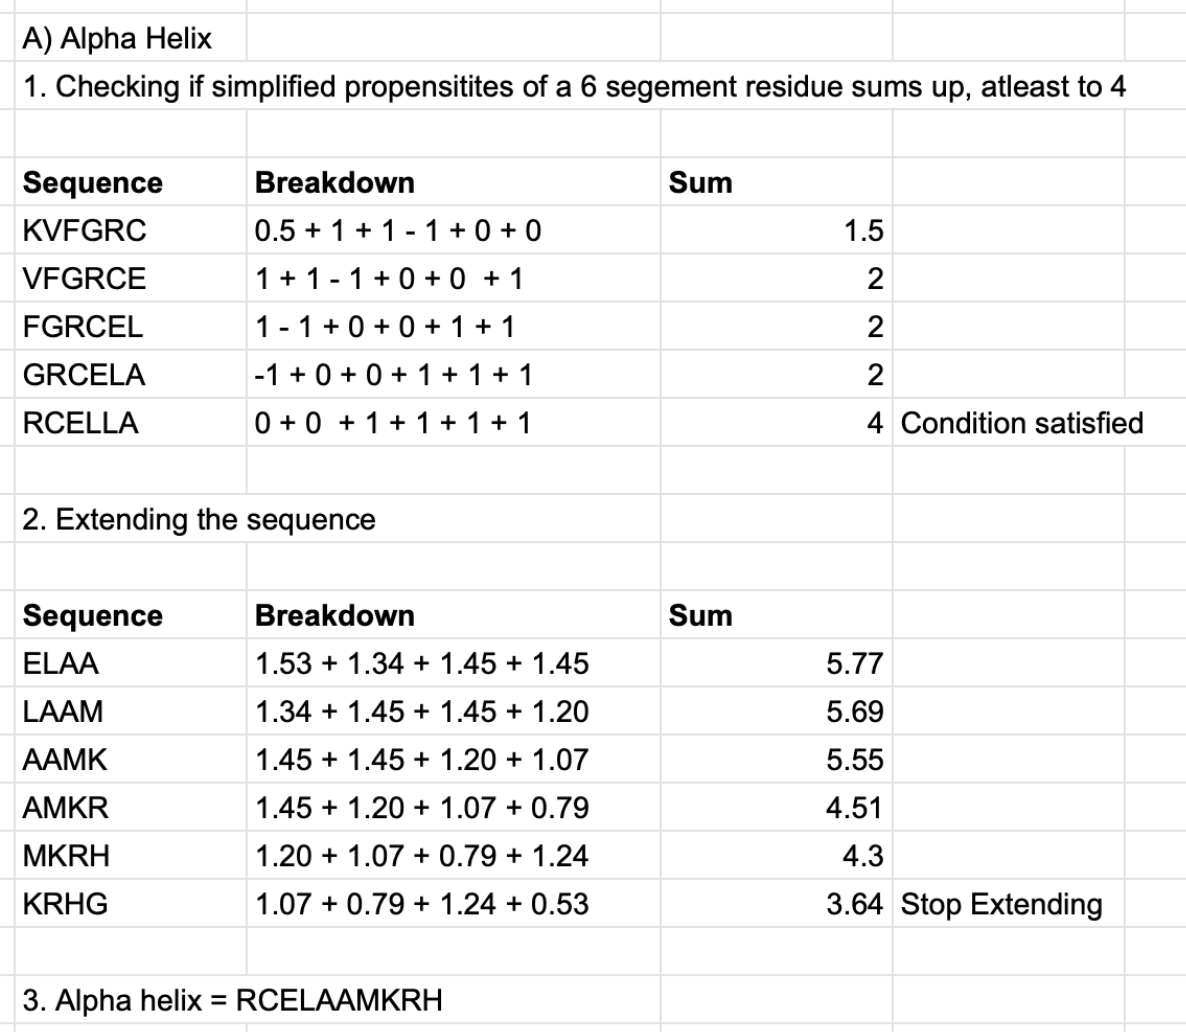

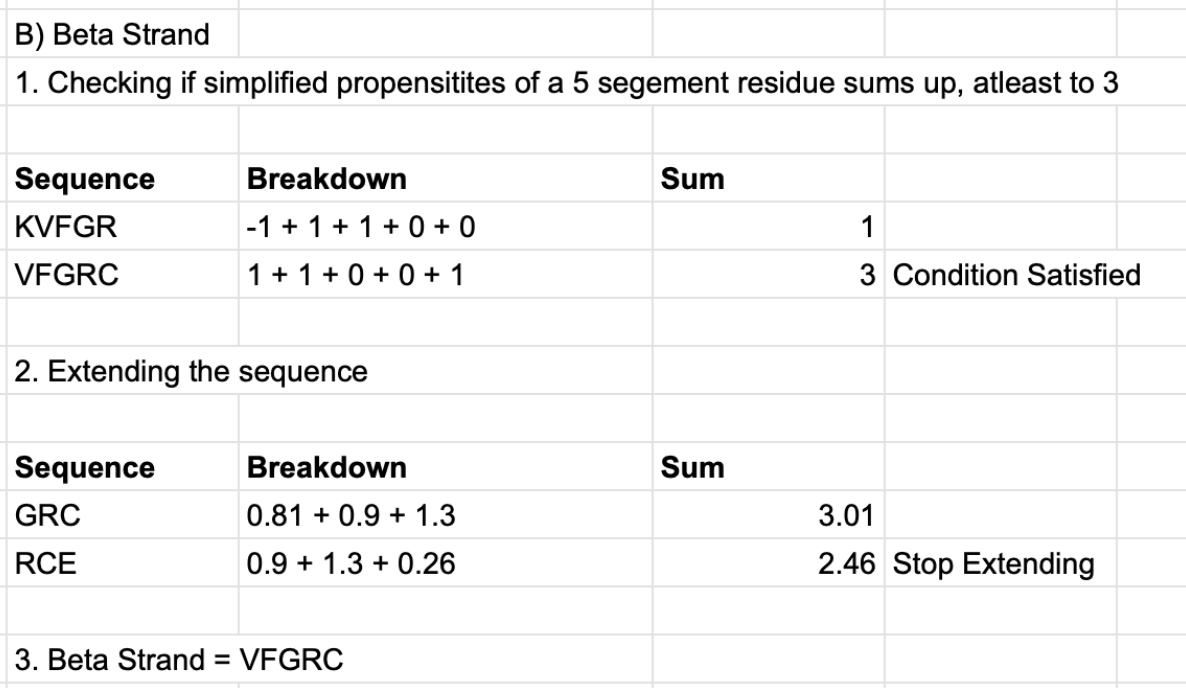